In [1]:
from io import BytesIO
import requests
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.gis import GIS
from arcgis.mapping import WebMap
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
def getGisConnection():
    """Returns the gis object."""
    gis = GIS("https://utoronto.maps.arcgis.com",client_id="xx")
    return gis

In [3]:
# reference - https://developers.arcgis.com/python/sample-notebooks/covid19-part1-mapping-the-pandemic/
def get_fset(src_url, region):
    """
    Returns the FeatureLayer object and dataframe for the specified region (country) which has updated COVID-19 information.
        Parameters:
            src_url (string): the source url for FeatureLayer which has updated COVID-19 information.
            region (string): region (country) of interest
        Returns:
            fset (FeatureSet object): FeatureSet for the specific region
            fset_df (dataframe): a dataframe containing the same information as the FeatureSet
    """
    fl = FeatureLayer(url=src_url)
    fset = fl.query(where="Country_Region='" + region + "'")
    fset_df = fl.query(where="Country_Region='" + region + "'", as_df=True)
    return fset, fset_df

def get_data(gis, map_id, fset):
    """
    Returns the data which can be used to build the choropleth map.
        Parameters:
            gis: GIS object
            map_id (string): ID of the map containing the provincial borders of the region curated by ESRI
            fset  (string): FeatureSet of the region of interest
        Returns:
            overlap_rows (dataframe): a dataframe containing the geographic (location and geometries) and COVID information
    """
    provinces_item = gis.content.get(map_id)
    provinces_flayer = provinces_item.layers[0]
    provinces_df = provinces_flayer.query(as_df=True)
    df = fset[['Province_State', 'Confirmed', 'Recovered', 'Deaths']]
    df = df.assign(statename = df["Province_State"])
    cols_4 = ['distname','statename', 'SHAPE']
    overlap_rows = pd.merge(left = provinces_df[cols_4], right = df, how='inner', on = 'statename')
    return overlap_rows

In [4]:
# reference - https://developers.arcgis.com/python/sample-notebooks/covid19-part1-mapping-the-pandemic/
def gis_map(gis, region, feature_layer, field):
    """
    Returns a map which displays the datapoints as points whose size depends on the value of the datapoint
        Parameters:
            gis: GIS object
            region (string): region (country) of interest
            feature_layer (FeatureLayer object): FeatureLayer that can be added on the map
            field (string): field that needs to be displayed (example- Confirmed, Deaths)
        Returns:
            map1 (map object): map object for the specific region
    """
    map1 = gis.map(region, zoomlevel=4)
    map1.add_layer(feature_layer,   {"type": "FeatureLayer",
                                   "renderer":"ClassedSizeRenderer",
                                   "field_name":field})
    map1.legend = True
    return map1


def gis_choropleth_map(gis, region, overlap_rows, field):
    """
    Returns a choropleth map for the region of interest
        Parameters:
            gis: GIS object
            region (string): region (country) of interest
            overlap_rows (dataframe): dataframe containing geographic and COVID information
            field (string): field that needs to be displayed (example- Confirmed, Deaths)
        Returns:
            map1 (map object): map object for the specific region
    """
    map1 = gis.map(region, zoomlevel=4)
    overlap_rows_india.spatial.plot(kind='map', map_widget=map1,
                                  renderer_type='c',  # for class breaks renderer
                                  method='esriClassifyNaturalBreaks',  # classification algorithm
                                  class_count=4,  # choose the number of classes
                                  col=field,  # numeric column to classify
                                  cmap='inferno',  # color map to pick colors from for each class
                                  alpha=0.8  # specify opacity
                                 )
    map1.legend = True
    return map1

## Connect to GIS server

In [5]:
try:
    gis = getGisConnection()
except:
    print("Could not connect to arcgis online. Please try again.")

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest//oauth2/authorize?response_type=code&client_id=gJDjyMIQzIcVsAQY&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=0efHiSENnZPKHDzo3urOnQ1x7YLHoB
Enter code obtained on signing in using SAML: ········


## COVID-19 in India

In [6]:
try:
    # source url containing the updated COVID-19 information
    src_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
    fset_india, fset_df_india = get_fset(src_url, "India")
    india_map_id = "c436f12ae33b4659b4c39ccf061f816b"
    # contains COVID numbers for all states of India along with their shapes (geography)
    overlap_rows_india = get_data(gis, india_map_id, fset_df_india) 
except:
    print("Something went wrong while retrieving the COVID-19 data. Please try again.")

### Geographical Visualisations

In [7]:
try:
    map_india_confirmed = gis_map(gis, "India", fset_india, "Confirmed")
    map_india_deaths = gis_map(gis, "India", fset_india, "Deaths")
    poly_india_confirmed = gis_choropleth_map(gis, "India", overlap_rows_india,"Confirmed")
    poly_india_deaths = gis_choropleth_map(gis, "India", overlap_rows_india,"Deaths")
except:
    print("Something went wrong while displyaing the maps. Please try again.")

In [8]:
print("Statewise COVID-19 confirmed cases in India")
map_india_confirmed

Statewise COVID-19 confirmed cases in India


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [9]:
print("Statewise deaths due to COVID-19 in India")
map_india_deaths

Statewise deaths due to COVID-19 in India


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [10]:
print("Statewise COVID-19 confirmed cases in India")
poly_india_confirmed

Statewise COVID-19 confirmed cases in India


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [11]:
print("Statewise deaths due to COVID-19 in India")
poly_india_deaths

Statewise deaths due to COVID-19 in India


MapView(layout=Layout(height='400px', width='100%'), legend=True)

### Visualisations

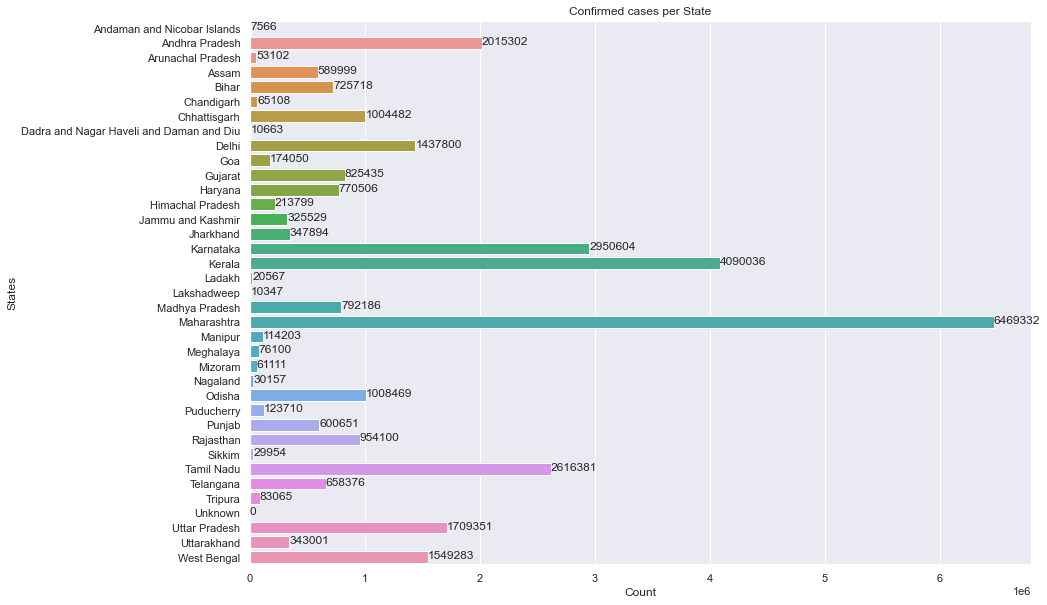

In [12]:
plt.figure(figsize=(14,10))
ax = sns.barplot(data = fset_df_india, x = "Confirmed", y = "Province_State")
plt.title('Confirmed cases per State')
plt.xlabel('Count')
plt.ylabel('States')

initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
    initialx+=1

plt.show()

#### Data from JHU for temporal visualisations

In [13]:
"""
Retrieve that data from Johns Hopkins Center for Systems Science and Engineering github page.
This data can be used to display Time Series Visualisation
Reference - https://towardsdatascience.com/visualise-covid-19-case-data-using-python-dash-and-plotly-e58feb34f70f
"""
baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
def loadData(fileName, columnName):
    data = pd.read_csv(baseURL + fileName) \
             .drop(['Lat', 'Long', 'Province/State'], axis=1) \
             .melt(id_vars='Country/Region', 
                 var_name='date', value_name=columnName) \
             .astype({'date':'datetime64[ns]', columnName:'Int64'}, 
                 errors='ignore')
    data[columnName].fillna(0, inplace=True)
    return data

allData = loadData(
    "time_series_covid19_confirmed_global.csv", "CumConfirmed") \
  .merge(loadData(
    "time_series_covid19_deaths_global.csv", "CumDeaths")) \
  .merge(loadData(
    "time_series_covid19_recovered_global.csv", "CumRecovered"))

In [14]:
# Get COVID-19 data for India
india_data = allData.loc[allData['Country/Region'] == 'India']
india_data = india_data.reset_index()

# The dataset contains only cumulative values. Add columns for daily counts.
india_data['newConfirmed'] = india_data.loc[:]["CumConfirmed"].diff(1)
india_data['newDeaths'] = india_data.loc[:]["CumDeaths"].diff(1)
india_data['newRecovered'] = india_data.loc[:]["CumRecovered"].diff(1)

In [15]:
# updating the display parameters for all graphs
params = {'legend.fontsize': 30,
         'axes.labelsize': 30,
         'axes.titlesize':30,
         'xtick.labelsize':30,
         'ytick.labelsize':30}
plt.rcParams.update(params)

<ipython-input-16-6e9f643a222d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
<ipython-input-16-6e9f643a222d>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ylabels)


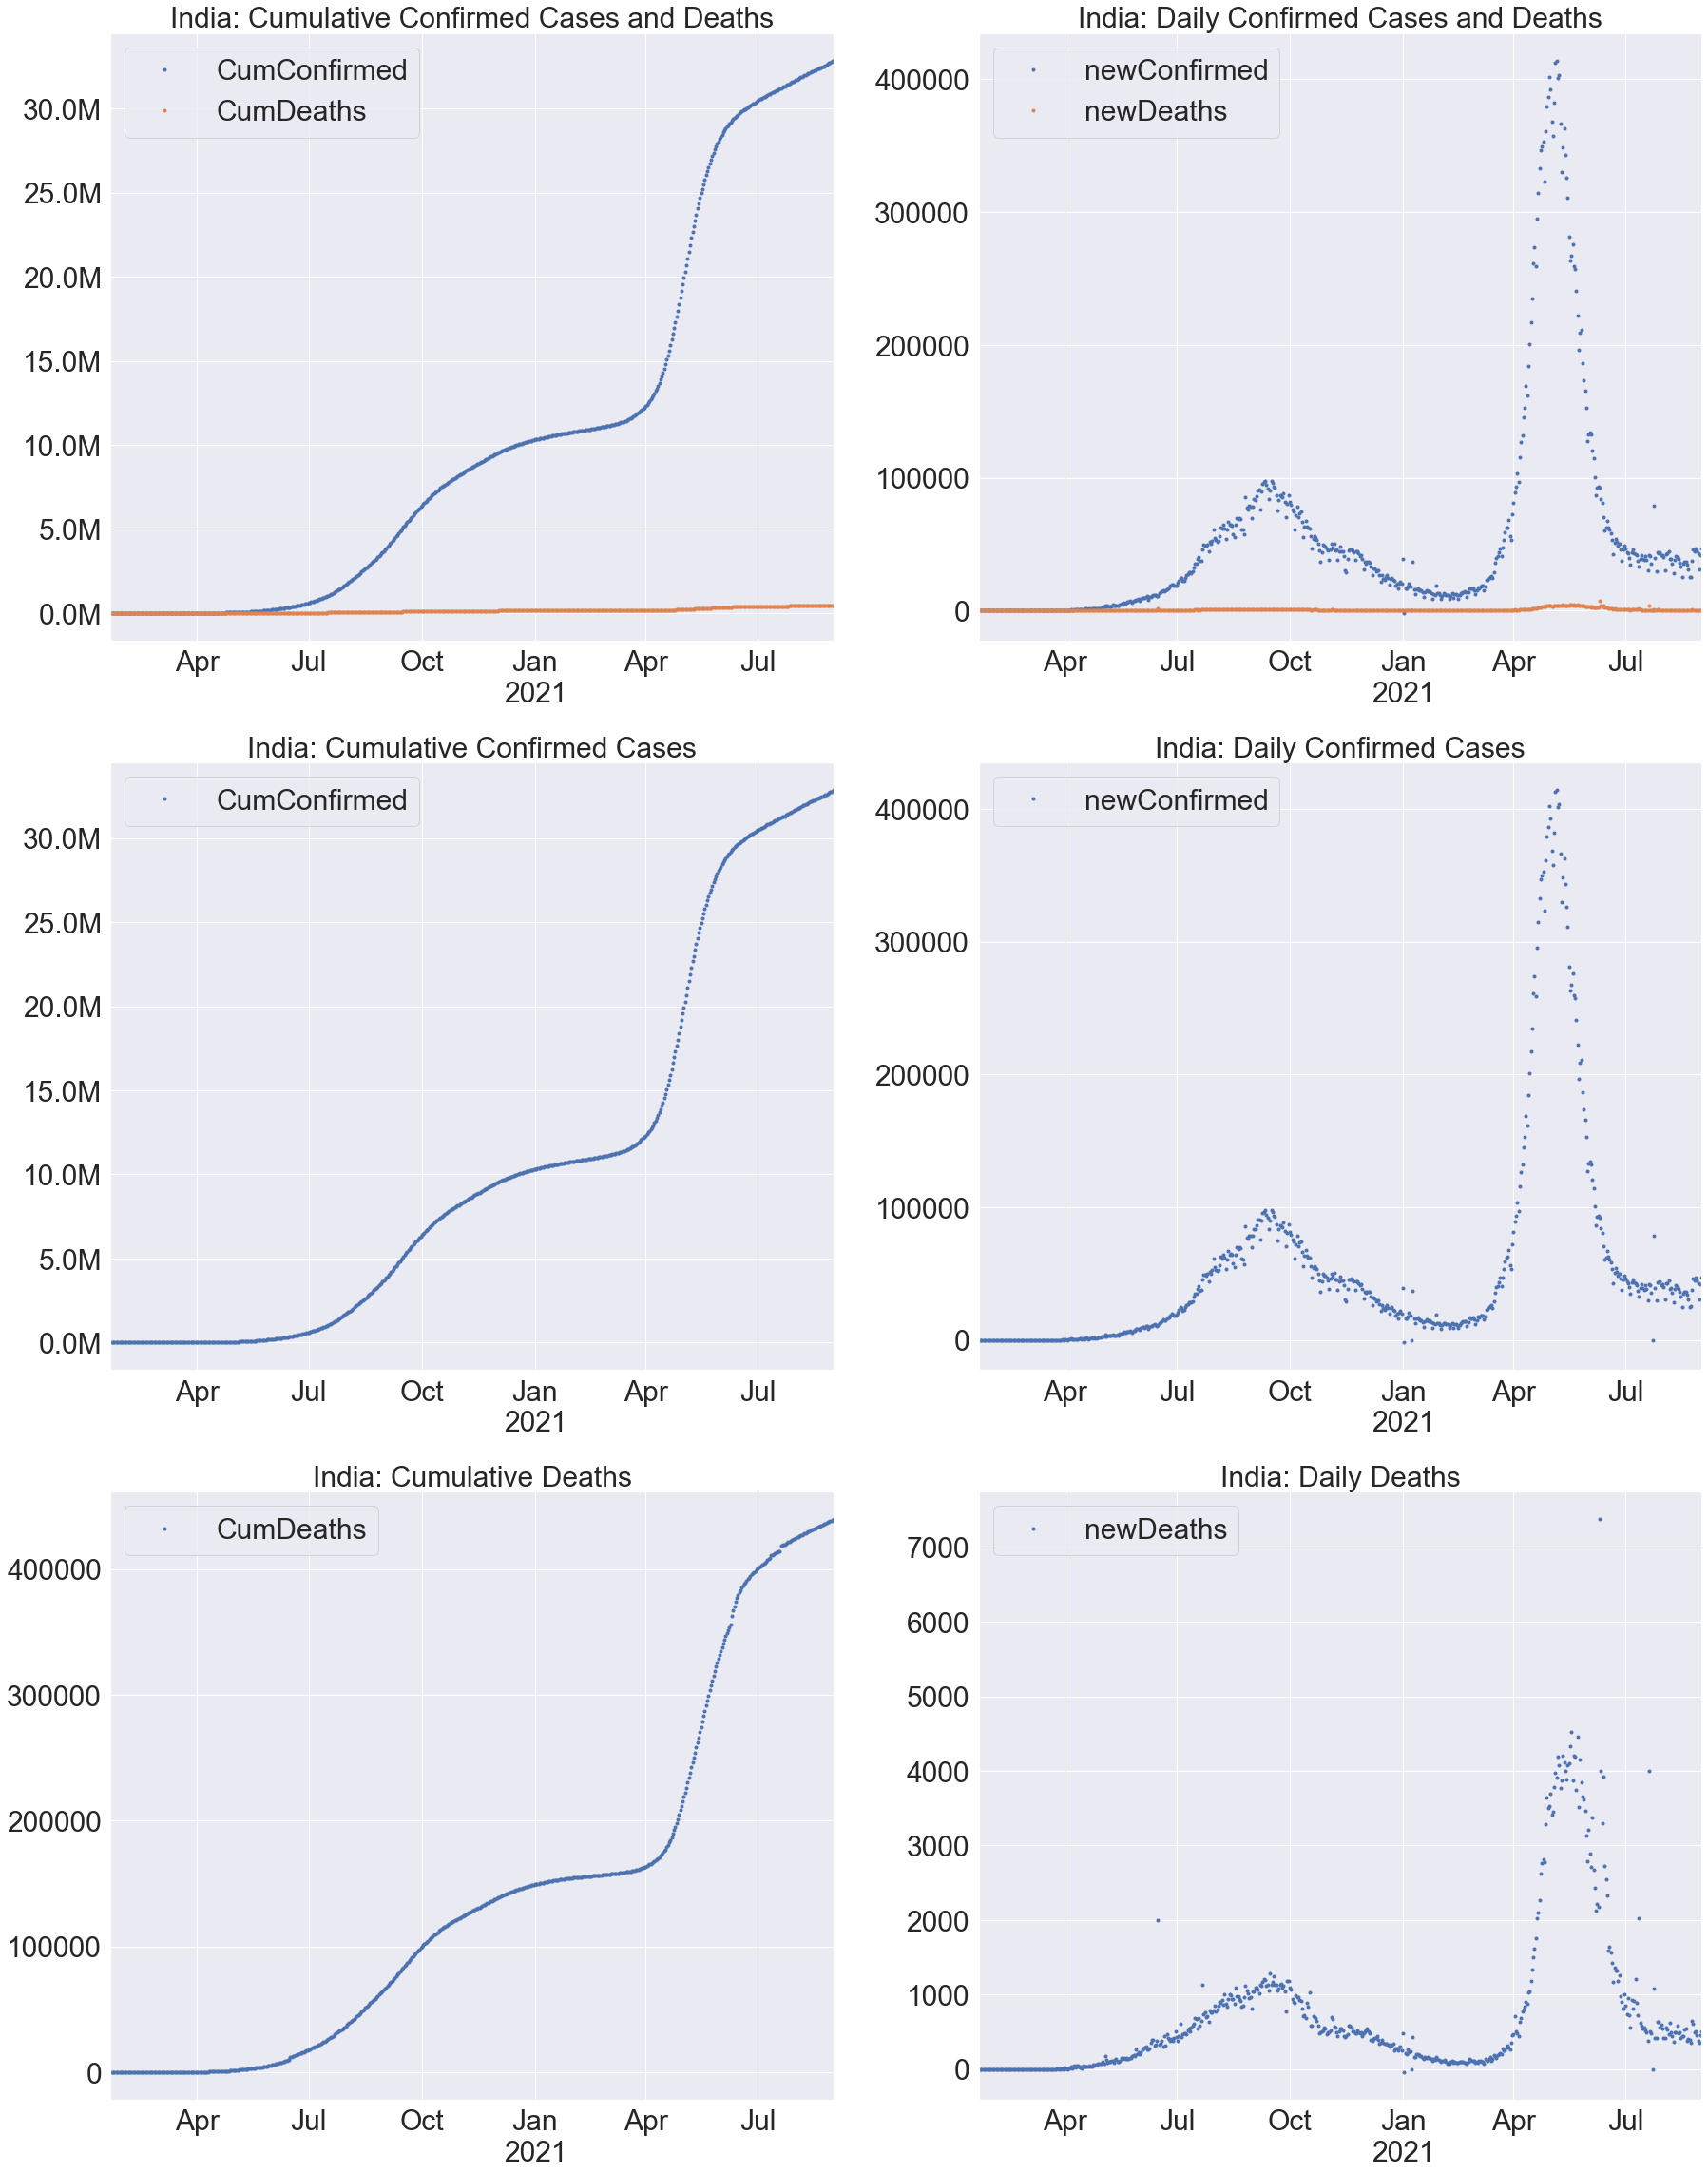

In [16]:
# plotting COVID data over time
plt.figure(figsize=(30,40))
plt.subplot(3,2,1)
india_data.plot(ax=plt.gca(), x="date", y=["CumConfirmed", "CumDeaths"], style='.')
ax1=plt.gca()
plt.title('India: Cumulative Confirmed Cases and Deaths')
ylabels = [str(y) + 'M' for y in ax1.get_yticks()/1000000]
ax1.set_yticklabels(ylabels)
plt.xlabel('')

plt.subplot(3,2,2)
plt.title('India: Daily Confirmed Cases and Deaths')
india_data.plot(ax=plt.gca(), x="date", y= ["newConfirmed", "newDeaths"], style='.')
plt.xlabel('')


plt.subplot(3,2,3)
india_data.plot(ax=plt.gca(), x="date", y="CumConfirmed", style='.')
ax3=plt.gca()
plt.title('India: Cumulative Confirmed Cases')
ylabels = [str(y) + 'M' for y in ax3.get_yticks()/1000000]
ax3.set_yticklabels(ylabels)
plt.xlabel('')

plt.subplot(3,2,4)
plt.title('India: Daily Confirmed Cases')
india_data.plot(ax=plt.gca(), x="date", y= "newConfirmed", style='.')
plt.xlabel('')


plt.subplot(3,2,5)
india_data.plot(ax=plt.gca(), x="date", y="CumDeaths", style='.')
ax5=plt.gca()
plt.title('India: Cumulative Deaths')

plt.xlabel('')
plt.subplot(3,2,6)
plt.title('India: Daily Deaths')
india_data.plot(ax=plt.gca(), x="date", y= "newDeaths", style='.')
plt.xlabel('')

plt.show()